In [ ]:
import imageio
import glob
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
path = "C:/Users/karni/Documents/Data Science and Society Coursework/Blok 1/Deep Learning/Assignment/Train Data set/Train/Train/"

In [ ]:
genders = ['Male', 'Female']
frmt = "png"

In [ ]:
def imgtodataset(path, genders, frmt):
    data_l = []
    label_l = []
    
    for i in range(len(genders)):
        for im_path in glob.glob(path + genders[i] + "/*." + frmt):
            im = imageio.imread(im_path)
            arr = np.array(im)
            data_l.append(arr)
            label_l.append(i)

    data = np.array(data_l)
    label = np.array(label_l)        
    
    return data, label

In [ ]:
data, label = imgtodataset(path, genders, frmt)

In [ ]:
## np.savez('training_data.npz', data, label)

In [ ]:
data_pp = tf.keras.applications.vgg16.preprocess_input(
        data, data_format=None
    )

In [ ]:
model1 = tf.keras.applications.vgg16.VGG16(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(100,100,3), pooling=max, classes=2)

58892288/58889256 [==============================] - 3s 0us/step


In [ ]:
model1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [ ]:
model1.trainable = False

In [ ]:
inputs = keras.Input(shape=(100, 100, 3))

In [ ]:
x = model1(inputs, training=False)

In [ ]:
x = keras.layers.Flatten()(x)

In [ ]:
outputs = keras.layers.Dense(1)(x)

In [ ]:
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.Accuracy(), keras.metrics.AUC(), keras.metrics.Precision(),keras.metrics.Recall(), 
                      keras.metrics.TruePositives(), keras.metrics.TrueNegatives(), keras.metrics.TFalsePositives(), 
                        keras.metrics.FalseNegatives()])

In [ ]:
history = model.fit(data_pp, label, epochs=2, validation_split = 0.5)

Epoch 1/2
174/174 [==============================] - 359s 2s/step - loss: 0.0146 - binary_accuracy: 0.9953 - val_loss: 19.8058 - val_binary_accuracy: 0.0738
Epoch 2/2
174/174 [==============================] - 365s 2s/step - loss: 4.6930e-07 - binary_accuracy: 1.0000 - val_loss: 19.8112 - val_binary_accuracy: 0.0738


In [ ]:
history.history

{'loss': [0.014630516991019249, 4.693013693213288e-07],
 'binary_accuracy': [0.9953296184539795, 1.0],
 'val_loss': [19.80577850341797, 19.811233520507812],
 'val_binary_accuracy': [0.07381465286016464, 0.07381465286016464]}

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


In [ ]:
import matplotlib.pyplot as plt


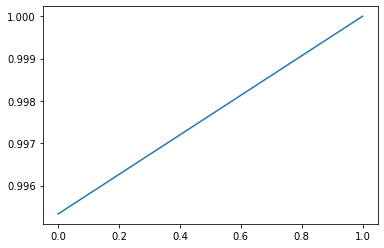

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])

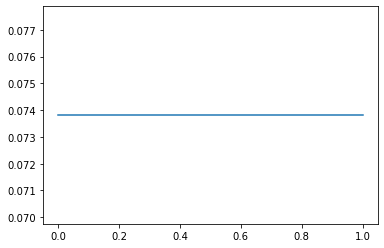

In [ ]:
plt.plot(history.history['val_accuracy'])

In [ ]:
history.history['val_accuracy']

[0.8823529481887817]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9c67a883-3918-439e-a462-2827f4672e07' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>